<a href="https://colab.research.google.com/github/Shailja-28/unemployment_-in-_india/blob/main/German_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Performing Cross validation, Feature selection and PCA on German dataset.**

##Import libraries

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

##loading dataset

In [3]:
df = pd.read_csv('/content/german .csv')

In [16]:
df.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account,Present employment since,Present residence since,Personal status and sex,Other debtors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of dependents,Telephone,Foreign worker,target
0,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,2
1,3,12,4,7,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,1
2,0,42,2,3,7882,0,3,2,2,2,...,1,45,2,2,1,2,2,0,0,1
3,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,2
4,3,36,2,7,9055,4,2,2,2,0,...,3,35,2,2,1,1,2,1,0,1


In [17]:
df.nunique()

Status of existing checking account                      4
Duration in month                                       33
Credit history                                           5
Purpose                                                 10
Credit amount                                          921
Savings account                                          5
Present employment since                                 5
Present residence since                                  4
Personal status and sex                                  4
Other debtors                                            3
Installment rate in percentage of disposable income      4
Property                                                 4
Age in years                                            53
Other installment plans                                  3
Housing                                                  3
Number of existing credits at this bank                  4
Job                                                     

In [19]:
df.tail()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account,Present employment since,Present residence since,Personal status and sex,Other debtors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of dependents,Telephone,Foreign worker,target
994,3,12,2,3,1736,0,3,3,1,0,...,0,31,2,1,1,1,1,0,0,1
995,0,30,2,1,3857,0,2,4,0,0,...,1,40,2,1,1,3,1,1,0,1
996,3,12,2,4,804,0,4,4,2,0,...,2,38,2,1,1,2,1,0,0,1
997,0,45,2,4,1845,0,2,4,2,0,...,3,23,2,2,1,2,1,1,0,2
998,1,45,4,1,4576,1,0,3,2,0,...,2,27,2,1,1,2,1,0,0,1


##Column mapping

In [4]:
column_mapping = {
    "A11": "Status of existing checking account",
    "6": "Duration in month",
    "A34": "Credit history",
    "A43": "Purpose",
    "1169": "Credit amount",
    "A65": "Savings account",
    "A75": "Present employment since",
    "4.1": "Installment rate in percentage of disposable income",
    "A93": "Personal status and sex",
    "A101": "Other debtors",
    "4": "Present residence since",
    "A121": "Property",
    "67": "Age in years",
    "A143": "Other installment plans",
    "A152": "Housing",
    "2": "Number of existing credits at this bank",
    "A173": "Job",
    "1": "Number of dependents",
    "A192": "Telephone",
    "A201": "Foreign worker",
    "1.1": "target"
}
df.rename(columns=column_mapping, inplace=True)

## Encode categorical features as numbers and Separate features and target

In [5]:
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

X = df.drop('target', axis=1)
y = df['target']

## **Feature selection**

In [6]:
chi2_selector = SelectKBest(chi2, k='all')
X_kbest = chi2_selector.fit_transform(X, y)
feature_scores = chi2_selector.scores_

feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Score': feature_scores})
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False).reset_index(drop=True)
print(feature_scores_df)

                                              Feature         Score
0                                       Credit amount  57882.977758
1                                   Duration in month    318.524204
2                 Status of existing checking account    123.841565
3                                     Savings account     71.521074
4                                        Age in years     29.048836
5                                      Credit history     23.942493
6                                            Property     16.296790
7                            Present employment since      8.117739
8                                      Foreign worker      6.504378
9                             Other installment plans      3.565349
10                            Personal status and sex      2.301708
11                            Present residence since      2.243163
12                                      Other debtors      1.008648
13                                          Tele

##**PCA**

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Defining Classifiers

In [9]:
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

### Evaluate model and classifiers

In [10]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, recall, precision, f1

    results = {}
for name, clf in classifiers.items():
    accuracy, recall, precision, f1 = evaluate_model(clf, X_train, X_test, y_train, y_test)
    results[name] = {'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'F1 Score': f1}

results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy  Recall  Precision  F1 Score
Logistic Regression     0.725   0.725   0.707206  0.690990
Decision Tree           0.675   0.675   0.663071  0.667668
Random Forest           0.735   0.735   0.725922  0.695679
SVM                     0.700   0.700   0.729744  0.598264
K-Nearest Neighbors     0.650   0.650   0.600220  0.608726


## **K-fold Cross Validation**

In [11]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)
cv_results = {}
for name, clf in classifiers.items():
    cv_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')
    cv_results[name] = cv_scores.mean()

cv_results_df = pd.DataFrame(cv_results, index=['Cross-Validation Accuracy']).T
print(cv_results_df)

bias_columns = ['Foreign worker', 'Personal status and sex']
X_bias_removed = X.drop(bias_columns, axis=1)
X_train_bias_removed, X_test_bias_removed, y_train, y_test = train_test_split(X_bias_removed, y, test_size=0.2, random_state=42)

bias_results = {}
for name, clf in classifiers.items():
    accuracy, recall, precision, f1 = evaluate_model(clf, X_train_bias_removed, X_test_bias_removed, y_train, y_test)
    bias_results[name] = {'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'F1 Score': f1}

bias_results_df = pd.DataFrame(bias_results).T
print(bias_results_df)

                     Cross-Validation Accuracy
Logistic Regression                   0.757778
Decision Tree                         0.690677
Random Forest                         0.771778
SVM                                   0.708717
K-Nearest Neighbors                   0.657616
                     Accuracy  Recall  Precision  F1 Score
Logistic Regression     0.725   0.725   0.706548  0.694107
Decision Tree           0.660   0.660   0.654259  0.656872
Random Forest           0.740   0.740   0.728150  0.709339
SVM                     0.700   0.700   0.729744  0.598264
K-Nearest Neighbors     0.650   0.650   0.600220  0.608726


## **Decision Tree Pruning**

In [12]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

pruned_results = []
for ccp_alpha in ccp_alphas:
    clf_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf_pruned.fit(X_train, y_train)
    y_pred = clf_pruned.predict(X_test)
    pruned_results.append((ccp_alpha, accuracy_score(y_test, y_pred)))

### Plot accuracy vs. alpha for pruning

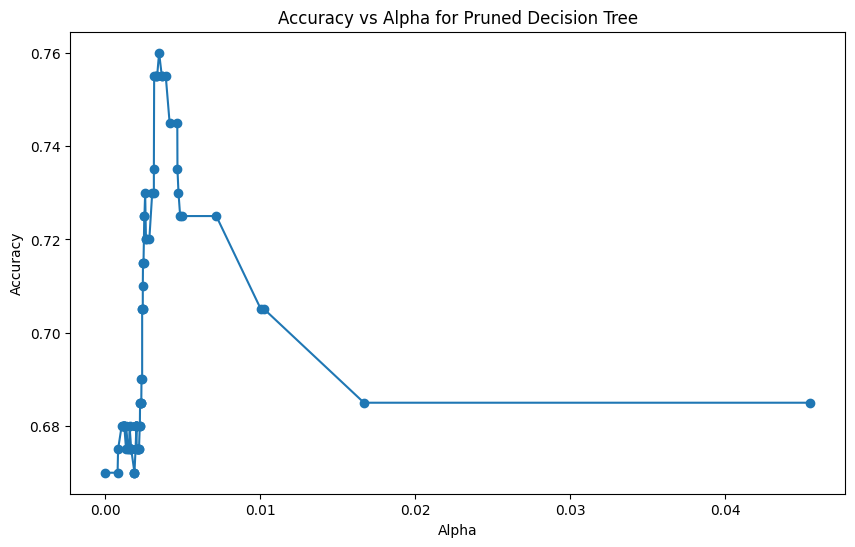

In [13]:
pruned_results = pd.DataFrame(pruned_results, columns=['Alpha', 'Accuracy'])
plt.figure(figsize=(10, 6))
plt.plot(pruned_results['Alpha'], pruned_results['Accuracy'], marker='o')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Alpha for Pruned Decision Tree')
plt.show()

## **Visualizing feature importance**

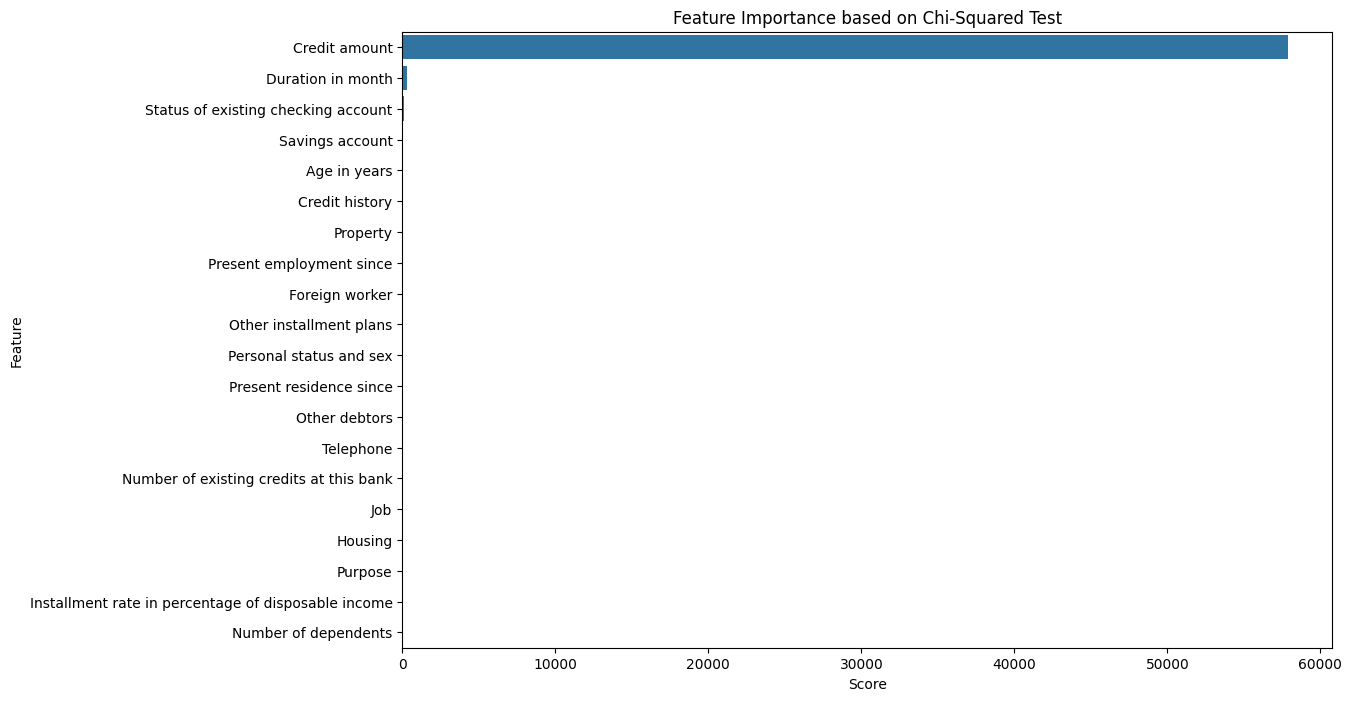

In [14]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Score', y='Feature', data=feature_scores_df)
plt.title('Feature Importance based on Chi-Squared Test')
plt.show()

## **Visualizing PCA results**

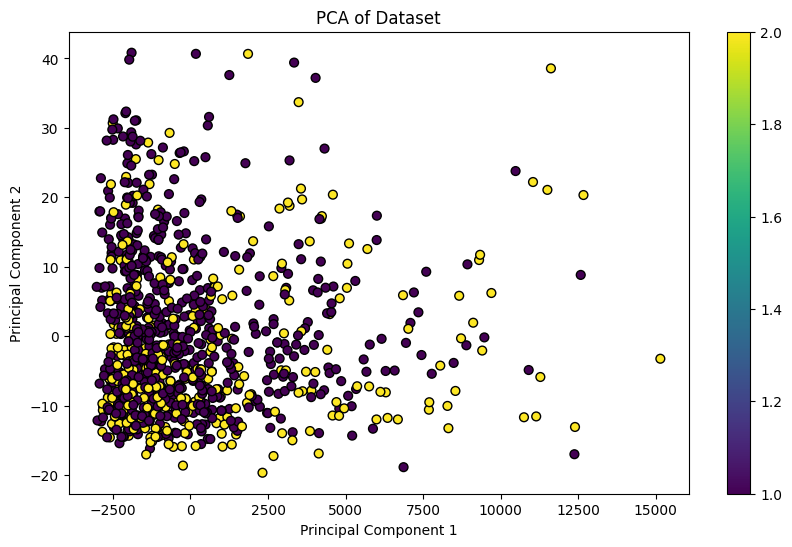

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.colorbar()
plt.show()